# Aim: 

The aim of this project is to analyse the order and product tables of two restaurants. While looking at the data, I found that there was a difference between product price that sales price. So far, I've performed various aggregations and plotted out some key findings below. 

In [0]:
restaurant_1_orders = sqlContext.read.load('/FileStore/tables/restaurant_1_orders.csv',format='csv',header='True',inferSchema='True')
restaurant_1_products = sqlContext.read.load('/FileStore/tables/restaurant_1_products_price.csv',format='csv',header='True',inferSchema='True')

In [0]:
restaurant_1_orders.show()
#restaurant_1_orders.count()

+------------+----------------+--------------------+--------+-------------+--------------+
|Order Number|      Order Date|           Item Name|Quantity|Product Price|Total products|
+------------+----------------+--------------------+--------+-------------+--------------+
|       16118|03/08/2019 20:25|       Plain Papadum|       2|          0.8|             6|
|       16118|03/08/2019 20:25|    King Prawn Balti|       1|        12.95|             6|
|       16118|03/08/2019 20:25|         Garlic Naan|       1|         2.95|             6|
|       16118|03/08/2019 20:25|       Mushroom Rice|       1|         3.95|             6|
|       16118|03/08/2019 20:25| Paneer Tikka Masala|       1|         8.95|             6|
|       16118|03/08/2019 20:25|       Mango Chutney|       1|          0.5|             6|
|       16117|03/08/2019 20:17|          Plain Naan|       1|          2.6|             7|
|       16117|03/08/2019 20:17|       Mushroom Rice|       1|         3.95|             7|

In [0]:
restaurant_1_products.show()
#restaurant_1_products.count()

+-------------+-------------+
|    Item Name|Product Price|
+-------------+-------------+
|   Mint Sauce|          0.5|
|  Lime Pickle|          0.5|
|Mango Chutney|          0.5|
|    Red Sauce|          0.5|
|Onion Chutney|          0.5|
|Plain Papadum|          0.8|
|Spicy Papadum|          0.8|
|      Chapati|         1.95|
|        Puree|         1.95|
|Tandoori Roti|          2.6|
|   Plain Naan|          2.6|
|       Raitha|         2.95|
|   Keema Naan|         2.95|
|Peshwari Naan|         2.95|
|   Pilau Rice|         2.95|
|  Green Salad|         2.95|
|  Bottle Coke|         2.95|
|   Plain Rice|         2.95|
|  Garlic Naan|         2.95|
|   Onion Naan|         2.95|
+-------------+-------------+
only showing top 20 rows



In [0]:
display(restaurant_1_orders.describe())

summary,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
count,74818,74818,74818,74818,74818,74818
mean,9115.63816193964,null,null,1.24356438290251,5.286491886982787,6.93143361223235
stddev,4052.2104520331745,null,null,0.7982073410496792,3.3382213559897,3.9548324912473527
min,630,01/01/2017 17:31,Aloo Chaat,1,0.5,1
max,16118,31/12/2018 21:56,Vindaloo Sauce,51,17.95,60


In [0]:
display(restaurant_1_products.describe())

summary,Item Name,Product Price
count,248,248
mean,null,7.981048387096797
stddev,null,3.326233555489663
min,Aloo Chaat,0.5
max,Vindaloo Sauce,17.95



## Dropping duplicates from order and product tables

In [0]:
restaurant_1_products_no_duplicates = restaurant_1_products.distinct()
display(restaurant_1_products_no_duplicates.describe())

summary,Item Name,Product Price
count,248,248
mean,null,7.981048387096804
stddev,null,3.326233555489663
min,Aloo Chaat,0.5
max,Vindaloo Sauce,17.95


In [0]:
#x = restaurant_1_orders.drop_duplicates()
#display(x.describe())
restaurant_1_orders_no_duplicates = restaurant_1_orders.distinct() # Returns the same value as drop duplicates 
display(restaurant_1_orders_no_duplicates.describe())

summary,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
count,74721,74721,74721,74721,74721,74721
mean,9116.917332476814,null,null,1.2438538028131316,5.283702707407005,6.9318799266605104
stddev,4051.598959886085,null,null,0.7986684235581327,3.3383770601150524,3.95590535991843
min,630,01/01/2017 17:31,Aloo Chaat,1,0.5,1
max,16118,31/12/2018 21:56,Vindaloo Sauce,51,17.95,60



## Table displaying the duplicate rows

In [0]:
duplicates = restaurant_1_orders.exceptAll(restaurant_1_orders_no_duplicates)
#duplicates.count() # appears to be 97 duplicate rows?.. 

duplicates.show()

+------------+----------------+-------------+--------+-------------+--------------+
|Order Number|      Order Date|    Item Name|Quantity|Product Price|Total products|
+------------+----------------+-------------+--------+-------------+--------------+
|        5205|23/04/2017 18:40|        Korma|       1|         8.95|             5|
|       13220|02/02/2019 18:19|Mango Chutney|       1|          0.5|             8|
|        6561|30/08/2017 19:02|        Bhuna|       1|         8.95|             2|
|        7080|14/10/2017 18:09|       Madras|       1|         7.95|             3|
|       13220|02/02/2019 18:19| Rogon - Lamb|       1|         8.95|             8|
|       13220|02/02/2019 18:19|Onion Chutney|       1|          0.5|             8|
|        7497|23/11/2017 17:40|        Curry|       1|         7.95|             3|
|        7213|28/10/2017 17:56|        Korma|       1|         8.95|             9|
|       13220|02/02/2019 18:19|    Red Sauce|       1|          0.5|        

In [0]:
#restaurant_1_orders = restaurant_1_orders.withColumnRenamed('Item Name', 'itemname') 
#restaurant_1_products = restaurant_1_products.withColumnRenamed('Item Name', 'itemname') 


### Displaying the duplicate 'Korma' orders for visualisation of duplicates, given it was in duplicates table above

In [0]:
korma_orders = restaurant_1_orders.filter(restaurant_1_orders["Item Name"]=='Korma')    # Plain Papadum

korma_orders_no_duplicates = korma_orders.distinct()
show_duplicate_kormas = korma_orders.exceptAll(korma_orders_no_duplicates)
show_duplicate_kormas.show() 

+------------+----------------+---------+--------+-------------+--------------+
|Order Number|      Order Date|Item Name|Quantity|Product Price|Total products|
+------------+----------------+---------+--------+-------------+--------------+
|        5205|23/04/2017 18:40|    Korma|       1|         8.95|             5|
|        7213|28/10/2017 17:56|    Korma|       1|         8.95|             9|
|        6705|13/09/2017 18:15|    Korma|       1|         8.95|             5|
|        3781|22/11/2016 19:36|    Korma|       1|         8.95|             7|
|        4933|31/03/2017 18:39|    Korma|       1|         8.95|             6|
|        7647|04/12/2017 20:12|    Korma|       1|         8.95|             4|
|        4234|08/01/2017 17:13|    Korma|       1|         8.95|             8|
|        3782|22/11/2016 19:42|    Korma|       1|         8.95|             7|
|        3780|22/11/2016 19:30|    Korma|       1|         8.95|             7|
|        8399|03/02/2018 17:23|    Korma

In [0]:
# Shows the the order 13220 is in fact duplicated as shown above 
proof_of_duplicate_order = restaurant_1_orders.filter((restaurant_1_orders["Item Name"]=='Korma') & (restaurant_1_orders["Order Number"]==5205)) #13220
proof_of_duplicate_order.show()

+------------+----------------+---------+--------+-------------+--------------+
|Order Number|      Order Date|Item Name|Quantity|Product Price|Total products|
+------------+----------------+---------+--------+-------------+--------------+
|        5205|23/04/2017 18:40|    Korma|       1|         8.95|             5|
|        5205|23/04/2017 18:40|    Korma|       1|         8.95|             5|
+------------+----------------+---------+--------+-------------+--------------+



### price_check gives all items where the sales vs product price do not match!

In [0]:
restaurant_1_products = restaurant_1_products.withColumnRenamed('Product Price', 'Product PriceB') 

left_join = restaurant_1_orders_no_duplicates.join(restaurant_1_products, "Item Name", "left")
#y.show()

price_check = left_join.filter(left_join['Product Price'] != left_join['Product PriceB'])
price_check.show()
#z.count() # 967 cases where purchase price != sales price

+-------------+------------+----------------+--------+-------------+--------------+--------------+
|    Item Name|Order Number|      Order Date|Quantity|Product Price|Total products|Product PriceB|
+-------------+------------+----------------+--------+-------------+--------------+--------------+
|Chicken Tikka|       12657|24/12/2018 19:08|       1|         4.95|            10|          3.95|
|Chicken Tikka|        3508|23/10/2016 18:20|       1|         4.95|             4|          3.95|
|Chicken Tikka|        2617|02/06/2016 21:19|       1|         4.95|             4|          3.95|
|Chicken Tikka|        2597|30/05/2016 17:18|       1|         4.95|            11|          3.95|
|        Korma|        6270|04/08/2017 19:15|       1|        12.95|            12|          8.95|
|Chicken Tikka|       10311|14/07/2018 20:28|       1|         4.95|             9|          3.95|
|Chicken Tikka|        7296|04/11/2017 19:23|       1|         4.95|             7|          3.95|
|Chicken T


### counts number of times items have been miss-priced 

In [0]:
count_missmatch = price_check.groupBy('Item Name','Product Price', 'Product PriceB').count().orderBy('count', ascending=0) #f2 
count_missmatch.show() 

+-------------+-------------+--------------+-----+
|    Item Name|Product Price|Product PriceB|count|
+-------------+-------------+--------------+-----+
|Chicken Tikka|         4.95|          3.95|  691|
|        Bhuna|        12.95|          8.95|   31|
|      Dhansak|         9.95|          8.95|   27|
|        Korma|         9.95|          8.95|   26|
|       Madras|        11.95|          7.95|   24|
|        Korma|        12.95|          8.95|   20|
|        Curry|         8.95|          7.95|   19|
|      Dhansak|        12.95|          8.95|   18|
|        Bhuna|         9.95|          8.95|   16|
|        Curry|        11.95|          7.95|   14|
|       Pathia|        12.95|          8.95|   13|
|         Saag|        12.95|          8.95|   12|
|     Vindaloo|         8.95|          7.95|   11|
|       Madras|         8.95|          7.95|   11|
|     Vindaloo|        11.95|          7.95|   10|
|         Saag|         9.95|          8.95|    5|
|        Rogon|        12.95|  

### Items by their overpayment value along with count of customers paying it

In [0]:
overpayment = count_missmatch.withColumn('Overpayment Value', count_missmatch['Product Price']- count_missmatch['Product PriceB'] ).orderBy(['Overpayment Value', 'count'], ascending=[0,0])
display(overpayment)  

Item Name,Product Price,Product PriceB,count,Overpayment Value
Bhuna,12.95,8.95,31,4.0
Korma,12.95,8.95,20,4.0
Dhansak,12.95,8.95,18,4.0
Pathia,12.95,8.95,13,4.0
Saag,12.95,8.95,12,4.0
Rogon,12.95,8.95,5,4.0
Dupiaza,12.95,8.95,3,4.0
Chicken Tikka,7.95,3.95,1,4.0
Madras,11.95,7.95,24,3.999999999999999
Curry,11.95,7.95,14,3.999999999999999



### Most made from item overpayments 

In [0]:
revenue_from_overpayment = overpayment.withColumn('Total_From_Overpayments', overpayment['count']*overpayment['Overpayment Value']).orderBy('Total_From_Overpayments',ascending=0)
revenue_from_overpayment.show() 

+-------------+-------------+--------------+-----+------------------+-----------------------+
|    Item Name|Product Price|Product PriceB|count| Overpayment Value|Total_From_Overpayments|
+-------------+-------------+--------------+-----+------------------+-----------------------+
|Chicken Tikka|         4.95|          3.95|  691|               1.0|                  691.0|
|        Bhuna|        12.95|          8.95|   31|               4.0|                  124.0|
|       Madras|        11.95|          7.95|   24| 3.999999999999999|      95.99999999999997|
|        Korma|        12.95|          8.95|   20|               4.0|                   80.0|
|      Dhansak|        12.95|          8.95|   18|               4.0|                   72.0|
|        Curry|        11.95|          7.95|   14| 3.999999999999999|     55.999999999999986|
|       Pathia|        12.95|          8.95|   13|               4.0|                   52.0|
|         Saag|        12.95|          8.95|   12|          

## Total made by items that are oversold at price N

In [0]:
Table_total_per_misspriced_item = revenue_from_overpayment.withColumn('Total', revenue_from_overpayment['count']*revenue_from_overpayment['Product Price']).orderBy('Total', ascending=0)
display(Table_total_per_misspriced_item)

Item Name,Product Price,Product PriceB,count,Overpayment Value,Total_From_Overpayments,Total
Chicken Tikka,4.95,3.95,691,1.0,691.0,3420.4500000000003
Bhuna,12.95,8.95,31,4.0,124.0,401.45
Madras,11.95,7.95,24,3.999999999999999,95.99999999999997,286.79999999999995
Dhansak,9.95,8.95,27,1.0,27.0,268.65
Korma,12.95,8.95,20,4.0,80.0,259.0
Korma,9.95,8.95,26,1.0,26.0,258.7
Dhansak,12.95,8.95,18,4.0,72.0,233.1
Curry,8.95,7.95,19,0.9999999999999991,18.999999999999982,170.04999999999998
Pathia,12.95,8.95,13,4.0,52.0,168.35
Curry,11.95,7.95,14,3.999999999999999,55.999999999999986,167.29999999999998


### Correct Total Shown Below: Given that item names appear twice due to having multiple overpayment values
 - e.g. Chicken Tikka is sold at (4.95 and 7.95)

In [0]:
item_total = Table_total_per_misspriced_item.groupBy('Item Name').sum('Total')
item_total = item_total.withColumnRenamed("sum(Total)","Total").orderBy('Total', ascending=0)
item_total.show()

+-------------+------------------+
|    Item Name|             Total|
+-------------+------------------+
|Chicken Tikka|            3428.4|
|        Bhuna|            560.65|
|        Korma|             517.7|
|      Dhansak|            501.75|
|       Madras|385.24999999999994|
|        Curry|337.34999999999997|
|     Vindaloo|            217.95|
|         Saag|205.14999999999998|
|       Pathia|             198.2|
|        Rogon|              74.7|
|      Dupiaza|              48.8|
|     Mushroom|              39.8|
|  Sheek Kehab|              5.95|
+-------------+------------------+



In [0]:
### Top 5: items by revenue 

In [0]:
item_total = item_total.toPandas()
item_total_top_5 = item_total.head()
item_total_top_5
#import seaborn as sns 

,Item Name,Total
0,Chicken Tikka,3428.40
1,Bhuna,560.65
2,Korma,517.70
3,Dhansak,501.75
4,Madras,385.25


### Total amount of money that was made by the group of items that were sold above price 
### (including when sales price = purchase price)
### Company A 

Out[65]: Text(0, 0.5, '(£)')

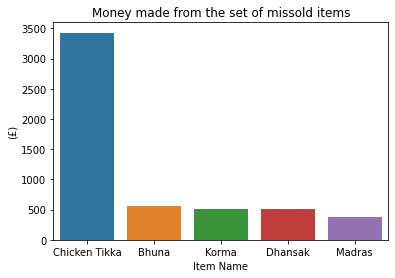

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.barplot(data=item_total_top_5, x = 'Item Name', y = 'Total')
plt.title('Money made from the set of missold items')
plt.ylabel('(£)')

### Total made from overpayments 

In [0]:
overpayment_per_item = Table_total_per_misspriced_item.groupBy('Item Name').sum('Total_From_Overpayments')
overpayment_per_item = overpayment_per_item.withColumnRenamed("sum(Total_From_Overpayments)","Total Made On Overpayments").orderBy('Total Made On Overpayments', ascending=0)
overpayment_per_item.show()

+-------------+--------------------------+
|    Item Name|Total Made On Overpayments|
+-------------+--------------------------+
|Chicken Tikka|                     695.0|
|        Bhuna|                     140.0|
|       Madras|        106.99999999999996|
|        Korma|                     106.0|
|      Dhansak|                      99.0|
|        Curry|         74.99999999999997|
|       Pathia|                      55.0|
|         Saag|                      53.0|
|     Vindaloo|        50.999999999999986|
|        Rogon|                      21.0|
|      Dupiaza|                      13.0|
|     Mushroom|                       4.0|
|  Sheek Kehab|                       1.0|
+-------------+--------------------------+



### Converting table into Pandas for plotting 

In [0]:
overpayment_per_item = overpayment_per_item.toPandas()
overpayment_per_item_top_5 = overpayment_per_item.head()

### Plot of top 5 items by how much in total customers spent over the sales price (Company A)

Out[68]: Text(0, 0.5, '(£)')

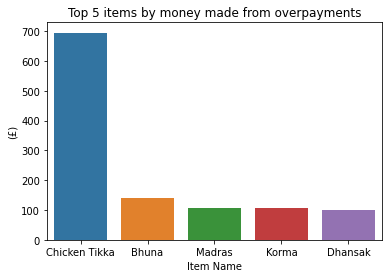

In [0]:
sns.barplot(data=overpayment_per_item_top_5, x = 'Item Name', y = 'Total Made On Overpayments')
plt.title('Top 5 items by money made from overpayments')
plt.ylabel('(£)')

### Money made from customers paying more than the product price (Company A)

In [0]:
overpayment_per_item['Total Made On Overpayments'].sum() # £1420 pounds made from overpayments 

Out[69]: 1420.0

## Looking at all items (company A) 
- No longer just looking at just miss-priced values 

In [0]:
All_items_table = restaurant_1_orders_no_duplicates
All_items_table.show()

+------------+----------------+--------------------+--------+-------------+--------------+
|Order Number|      Order Date|           Item Name|Quantity|Product Price|Total products|
+------------+----------------+--------------------+--------+-------------+--------------+
|       16115|03/08/2019 20:01|       Plain Papadum|       1|          0.8|             7|
|       16117|03/08/2019 20:17|       Mushroom Rice|       1|         3.95|             7|
|       16116|03/08/2019 20:09|          Aloo Chaat|       1|         4.95|             5|
|       16115|03/08/2019 20:01|      Chicken Pakora|       1|         5.95|             7|
|       16118|03/08/2019 20:25|       Mushroom Rice|       1|         3.95|             6|
|       16118|03/08/2019 20:25|       Mango Chutney|       1|          0.5|             6|
|       16118|03/08/2019 20:25|         Garlic Naan|       1|         2.95|             6|
|       16116|03/08/2019 20:09|      Chicken Pakora|       1|         5.95|             5|

### Shows items by the number of orders (Company A)
####Top 3
- Pilau Rice : 4721 
- Plain Naan : 3752 
- Plain Papadum : 3596

In [0]:
Count_All = All_items_table.groupBy('Item Name','Product Price').count().orderBy('count', ascending=0)
Count_All.show()

+--------------------+-------------+-----+
|           Item Name|Product Price|count|
+--------------------+-------------+-----+
|          Pilau Rice|         2.95| 4721|
|          Plain Naan|          2.6| 3752|
|       Plain Papadum|          0.8| 3596|
|         Garlic Naan|         2.95| 2628|
|        Onion Bhajee|         3.95| 2401|
|          Plain Rice|         2.95| 2369|
|Chicken Tikka Masala|         8.95| 2133|
|       Mango Chutney|          0.5| 2069|
|         Bombay Aloo|         5.95| 1752|
|       Peshwari Naan|         2.95| 1535|
|          Mint Sauce|          0.5| 1463|
|       Mushroom Rice|         3.95| 1452|
|          Keema Naan|         2.95| 1362|
|           Saag Aloo|         5.95| 1194|
|         Meat Samosa|         3.95| 1192|
|             Chapati|         1.95| 1170|
|               Korma|         8.95| 1131|
|       Onion Chutney|          0.5| 1032|
|      Butter Chicken|         9.95|  980|
|     Korma - Chicken|         8.95|  943|
+----------

### Shows items by total revenue generated (Company A)
####Top 3
- Chicken Tikka Masala : 19090
- Pilau Rice : 13926 
- Korma : 10640


In [0]:
total_all = Count_All.withColumn('Total_Price', Count_All['count']*Count_All['Product Price']).orderBy('Total_Price',ascending=0)
total_all = total_all.groupBy('Item Name').sum('Total_Price')
total_all = total_all.withColumnRenamed("sum(Total_Price)","Total_Price").orderBy('Total_Price', ascending=0)
total_all.show()

+--------------------+-----------------+
|           Item Name|      Total_Price|
+--------------------+-----------------+
|Chicken Tikka Masala|         19090.35|
|          Pilau Rice|         13926.95|
|               Korma|         10640.15|
|         Bombay Aloo|          10424.4|
|          Plain Naan|           9755.2|
|      Butter Chicken|           9751.0|
|        Onion Bhajee|          9483.95|
|     Korma - Chicken|8439.849999999999|
|Tandoori Mixed Grill|7946.749999999999|
|         Garlic Naan|           7752.6|
|Chicken Tikka (Main)|7204.749999999999|
|           Saag Aloo|           7104.3|
|          Plain Rice|          6988.55|
|     Chicken Biryani|          6477.45|
|              Madras|6403.400000000001|
|       Mushroom Rice|5735.400000000001|
|        Lamb Biryani|          5124.25|
|Chicken Tikka Bir...|5080.799999999999|
|         Meat Samosa|4708.400000000001|
|       Peshwari Naan|          4528.25|
+--------------------+-----------------+
only showing top

### Total revenue from of company A: 394,803

In [0]:
total_rev = total_all.toPandas()
total_rev = total_rev['Total_Price'].sum()
total_rev

Out[107]: 394803.55000000005

# Restaurant 2 Data

In [0]:
restaurant_2_orders = sqlContext.read.load('/FileStore/tables/restaurant_2_orders.csv',format='csv',header='True',inferSchema='True')
restaurant_2_products = sqlContext.read.load('/FileStore/tables/restaurant_2_products_price.csv',format='csv',header='True',inferSchema='True')

In [0]:
#restaurant_2_orders.show()
display(restaurant_2_orders.describe()) # 119,183 orders before duplicates are removed 

summary,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
count,119183,119183,119183,119183,119183,119183
mean,15185.997977899533,null,null,1.2488693857345428,5.108173145502638,7.246427762348657
stddev,6088.427753077414,null,null,0.7022026750515845,3.2077047387844217,2.9468085382306786
min,2096,01/01/2017 11:38,Achar Chicken,1,0.5,1
max,25583,31/12/2018 21:07,Vindaloo Sauce,20,17.95,29


In [0]:
#restaurant_2_products.show()
display(restaurant_2_products.describe()) # 302 items on the menu 

summary,Item Name,Product Price
count,302,302
mean,null,8.097847682119209
stddev,null,3.126654300196108
min,Achar Chicken,0.5
max,Vindaloo Sauce,17.95


#### Dropping duplicates from restaurant 2 table

In [0]:
restaurant_2_products_no_duplicates = restaurant_2_products.distinct()
display(restaurant_2_products_no_duplicates.describe())
# no duplicates exxist in the products table 

summary,Item Name,Product Price
count,302,302
mean,null,8.097847682119205
stddev,null,3.126654300196108
min,Achar Chicken,0.5
max,Vindaloo Sauce,17.95


In [0]:
restaurant_2_orders_no_duplicates = restaurant_2_orders.distinct() 
display(restaurant_2_orders_no_duplicates.describe())
# There are 119,183-119005 = 178 duplicate rows in the restaurant 2 orders table 

summary,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
count,119005,119005,119005,119005,119005,119005
mean,15192.056720305869,null,null,1.2491828074450653,5.103637242134048,7.246443426746775
stddev,6086.892557410138,null,null,0.7026286674826605,3.2073747073778027,2.946876384815573
min,2096,01/01/2017 11:38,Achar Chicken,1,0.5,1
max,25583,31/12/2018 21:07,Vindaloo Sauce,20,17.95,29


### price_check_2 gives all items from restaurant 2 where the sales vs product price do not match!

In [0]:
restaurant_2_products = restaurant_2_products.withColumnRenamed('Product Price', 'Product PriceB') 

left_join_2 = restaurant_2_orders.join(restaurant_2_products, "Item Name", "left")
#y.show()

price_check_2 = left_join_2.filter(left_join_2['Product Price'] != left_join_2['Product PriceB'])
price_check_2.show()

+---------+--------+----------------+--------+-------------+--------------+--------------+
|Item Name|Order ID|      Order Date|Quantity|Product Price|Total products|Product PriceB|
+---------+--------+----------------+--------+-------------+--------------+--------------+
| Vindaloo|   15669|04/04/2018 19:10|       1|         8.95|             3|          7.95|
|   Madras|   15639|02/04/2018 18:27|       1|         8.95|             8|          7.95|
|   Madras|   15638|02/04/2018 18:19|       1|         8.95|             7|          7.95|
|    Curry|   15627|02/04/2018 13:54|       1|         8.95|             3|          7.95|
|   Madras|   15611|01/04/2018 16:44|       1|         8.95|            10|          7.95|
|    Curry|   15593|31/03/2018 19:04|       1|         8.95|             6|          7.95|
|    Curry|   15538|29/03/2018 18:49|       1|         8.95|             6|          7.95|
|    Curry|   15512|27/03/2018 21:11|       1|         8.95|             5|          7.95|

### counts number of times items have been miss-priced 

In [0]:
count_missmatch_2 = price_check_2.groupBy('Item Name','Product Price', 'Product PriceB').count().orderBy('count', ascending=0)  
count_missmatch_2.show() 

+---------+-------------+--------------+-----+
|Item Name|Product Price|Product PriceB|count|
+---------+-------------+--------------+-----+
|   Madras|         8.95|          7.95|  163|
|    Curry|         8.95|          7.95|  154|
| Vindaloo|         8.95|          7.95|  109|
|    Curry|        11.95|          7.95|   44|
|  Dhansak|         9.95|          8.95|   37|
|   Madras|        11.95|          7.95|   34|
|    Korma|         9.95|          8.95|   21|
|    Bhuna|        12.95|          8.95|   19|
|   Pathia|        12.95|          8.95|   17|
|    Korma|        12.95|          8.95|   13|
| Vindaloo|        11.95|          7.95|    9|
|    Bhuna|         9.95|          8.95|    8|
|  Dupiaza|        12.95|          8.95|    7|
|   Pathia|         9.95|          8.95|    7|
|  Dhansak|        12.95|          8.95|    5|
|     Saag|        12.95|          8.95|    4|
|    Rogon|         9.95|          8.95|    3|
|   Malaya|         9.95|          8.95|    2|
|    Kurma|  

### Items by their overpayment value along with count of customers paying it

In [0]:
overpayment_2 = count_missmatch_2.withColumn('Overpayment Value', count_missmatch_2['Product Price']- count_missmatch_2['Product PriceB'] ).orderBy(['Overpayment Value', 'count'], ascending=[0,0])
display(overpayment_2) 

Item Name,Product Price,Product PriceB,count,Overpayment Value
Bhuna,12.95,8.95,19,4.0
Pathia,12.95,8.95,17,4.0
Korma,12.95,8.95,13,4.0
Dupiaza,12.95,8.95,7,4.0
Dhansak,12.95,8.95,5,4.0
Saag,12.95,8.95,4,4.0
Mushroom,12.95,8.95,1,4.0
Kurma,12.95,8.95,1,4.0
Curry,11.95,7.95,44,3.999999999999999
Madras,11.95,7.95,34,3.999999999999999


### Most made from item overpayments 

In [0]:
revenue_from_overpayment_2 = overpayment_2.withColumn('Total_From_Overpayments', overpayment_2['count']*overpayment_2['Overpayment Value']).orderBy('Total_From_Overpayments',ascending=0)
revenue_from_overpayment_2.show() 

+---------+-------------+--------------+-----+------------------+-----------------------+
|Item Name|Product Price|Product PriceB|count| Overpayment Value|Total_From_Overpayments|
+---------+-------------+--------------+-----+------------------+-----------------------+
|    Curry|        11.95|          7.95|   44| 3.999999999999999|     175.99999999999997|
|   Madras|         8.95|          7.95|  163|0.9999999999999991|     162.99999999999986|
|    Curry|         8.95|          7.95|  154|0.9999999999999991|     153.99999999999986|
|   Madras|        11.95|          7.95|   34| 3.999999999999999|     135.99999999999997|
| Vindaloo|         8.95|          7.95|  109|0.9999999999999991|      108.9999999999999|
|    Bhuna|        12.95|          8.95|   19|               4.0|                   76.0|
|   Pathia|        12.95|          8.95|   17|               4.0|                   68.0|
|    Korma|        12.95|          8.95|   13|               4.0|                   52.0|
|  Dhansak

### Total made by items that are oversold at price N

In [0]:
Table_total_per_misspriced_item_2 = revenue_from_overpayment_2.withColumn('Total', revenue_from_overpayment_2['count']*revenue_from_overpayment_2['Product Price']).orderBy('Total', ascending=0)
display(Table_total_per_misspriced_item_2)

Item Name,Product Price,Product PriceB,count,Overpayment Value,Total_From_Overpayments,Total
Madras,8.95,7.95,163,0.9999999999999991,162.99999999999986,1458.85
Curry,8.95,7.95,154,0.9999999999999991,153.99999999999986,1378.3
Vindaloo,8.95,7.95,109,0.9999999999999991,108.9999999999999,975.55
Curry,11.95,7.95,44,3.999999999999999,175.99999999999997,525.8
Madras,11.95,7.95,34,3.999999999999999,135.99999999999997,406.29999999999995
Dhansak,9.95,8.95,37,1.0,37.0,368.15
Bhuna,12.95,8.95,19,4.0,76.0,246.04999999999998
Pathia,12.95,8.95,17,4.0,68.0,220.14999999999998
Korma,9.95,8.95,21,1.0,21.0,208.95
Korma,12.95,8.95,13,4.0,52.0,168.35


### Correct Total: Given that items names appear twice due to having multiple overpayment values
- e.g. Madras (8.95 and 11.95) instead of 7.95

In [0]:
item_total_2 = Table_total_per_misspriced_item_2.groupBy('Item Name').sum('Total')
item_total_2 = item_total_2.withColumnRenamed("sum(Total)","Total").orderBy('Total', ascending=0)
item_total_2.show()

+---------+------------------+
|Item Name|             Total|
+---------+------------------+
|    Curry|            1904.1|
|   Madras|1865.1499999999999|
| Vindaloo|            1083.1|
|  Dhansak|             432.9|
|    Korma|377.29999999999995|
|    Bhuna|            325.65|
|   Pathia|289.79999999999995|
|  Dupiaza|             100.6|
|     Saag| 71.69999999999999|
|    Kurma|32.849999999999994|
|    Rogon|29.849999999999998|
|   Malaya|              19.9|
| Mushroom|             12.95|
|   Bombay|              9.95|
+---------+------------------+



In [0]:
item_total_2 = item_total_2.toPandas()
item_total_top_5_2 = item_total_2.head()
item_total_top_5_2

,Item Name,Total
0,Curry,1904.10
1,Madras,1865.15
2,Vindaloo,1083.10
3,Dhansak,432.90
4,Korma,377.30


Out[84]: Text(0, 0.5, '(£)')

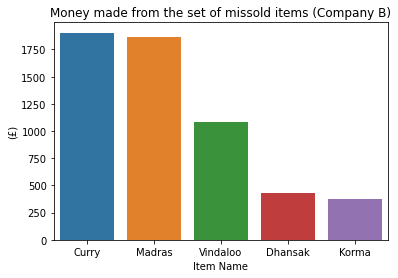

In [0]:
import matplotlib.pyplot as plt 

sns.barplot(data=item_total_top_5_2, x = 'Item Name', y = 'Total')
plt.title('Money made from the set of missold items (Company B)')
plt.ylabel('(£)')

In [0]:
overpayment_per_item_2 = Table_total_per_misspriced_item_2.groupBy('Item Name').sum('Total_From_Overpayments')
overpayment_per_item_2 = overpayment_per_item_2.withColumnRenamed("sum(Total_From_Overpayments)","Total Made On Overpayments").orderBy('Total Made On Overpayments', ascending=0)
overpayment_per_item_2.show()

+---------+--------------------------+
|Item Name|Total Made On Overpayments|
+---------+--------------------------+
|    Curry|        329.99999999999983|
|   Madras|        298.99999999999983|
| Vindaloo|         144.9999999999999|
|    Bhuna|                      84.0|
|   Pathia|                      75.0|
|    Korma|                      73.0|
|  Dhansak|                      57.0|
|  Dupiaza|                      29.0|
|     Saag|                      18.0|
|    Kurma|                       6.0|
| Mushroom|                       4.0|
|    Rogon|                       3.0|
|   Malaya|                       2.0|
|   Bombay|                       1.0|
+---------+--------------------------+



### Converts the table to a pandas dataframe for plotting purposes

In [0]:
# Converts the table to a pandas dataframe for plotting purposes

overpayment_per_item_2 = overpayment_per_item_2.toPandas()
overpayment_per_item_2_top_5 = overpayment_per_item_2.head() 

### Plot of top 5 items by how much in total customers paid over the sell price (Company B)

Out[87]: Text(0, 0.5, '(£)')

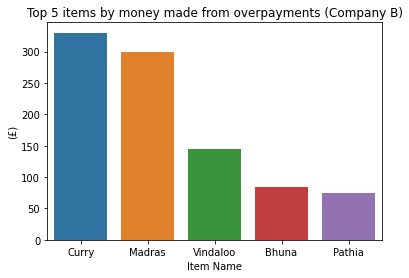

In [0]:
sns.barplot(data=overpayment_per_item_2_top_5, x = 'Item Name', y = 'Total Made On Overpayments')
plt.title('Top 5 items by money made from overpayments (Company B)')
plt.ylabel('(£)')

### Money made from customers paying more than the product price (Company B)

In [0]:
overpayment_per_item_2['Total Made On Overpayments'].sum() # £1125 pounds made from overpayments 

Out[88]: 1125.9999999999995

### Shows items by the number of orders (Company B)
####Top 3
- Pilau Rice : 8370
- Naan : 6679 
- Plain Papadum : 6431

In [0]:
Count_All_2 = restaurant_2_orders_no_duplicates.groupBy('Item Name','Product Price').count().orderBy('count', ascending=0)
Count_All_2.show()

+--------------------+-------------+-----+
|           Item Name|Product Price|count|
+--------------------+-------------+-----+
|          Pilau Rice|         2.95| 8370|
|                Naan|          2.5| 6679|
|       Plain Papadum|          0.8| 6431|
|         Bombay Aloo|         5.95| 4128|
|         Garlic Naan|         2.95| 3920|
|         Onion Bhaji|         3.95| 3593|
|Chicken Tikka Masala|         8.95| 3487|
|       Mango Chutney|          0.5| 3435|
|       Mushroom Rice|         3.95| 2963|
|          Plain Rice|         2.95| 2800|
|          Mint Sauce|          0.5| 2498|
|          Keema Naan|         2.95| 2463|
|       Peshwari Naan|         2.95| 2173|
|           Saag Aloo|         5.95| 2039|
|       Onion Chutney|          0.5| 1815|
|          Mini Bhaji|         3.95| 1719|
|               Korma|         8.95| 1625|
|      Butter Chicken|         8.95| 1515|
|              Madras|         7.95| 1502|
|           Red Sauce|          0.5| 1453|
+----------

### Shows items by total revenue generated (Company B)
####Top 3
- Chicken Tikka Masala : 31208
- Pilau Rice : 24691 
- Bombay Aloo : 24561

In [0]:
total_all_2 = Count_All_2.withColumn('Total_Price', Count_All_2['count']*Count_All_2['Product Price']).orderBy('Total_Price',ascending=0)
total_all_2 = total_all_2.groupBy('Item Name').sum('Total_Price')
total_all_2 = total_all_2.withColumnRenamed("sum(Total_Price)","Total_Price").orderBy('Total_Price', ascending=0)
total_all_2.show()

+--------------------+------------------+
|           Item Name|       Total_Price|
+--------------------+------------------+
|Chicken Tikka Masala|31208.649999999998|
|          Pilau Rice|           24691.5|
|         Bombay Aloo|24561.600000000002|
|                Naan|           16697.5|
|               Korma|          14921.05|
|         Onion Bhaji|          14192.35|
|              Madras|          13806.05|
|      Butter Chicken|13559.249999999998|
|Tandoori Mixed Grill|           12547.5|
|           Saag Aloo|12132.050000000001|
|       Mushroom Rice|          11703.85|
|Chicken Tikka (Main)|          11697.65|
|         Garlic Naan|           11564.0|
|     Chicken Biryani| 9333.099999999999|
|     Korma - Chicken|            9308.0|
|               Curry|            8516.5|
|          Plain Rice|            8260.0|
|          Keema Naan|           7265.85|
|Chicken Tikka Jal...| 7204.749999999999|
|Chicken Tikka Bir...|           7084.65|
+--------------------+------------

### Total revenue from of company B: 607,358

In [0]:
total_rev_2 = total_all_2.toPandas()
total_rev_2 = total_rev_2['Total_Price'].sum()
total_rev_2

Out[106]: 607358.3500000001


# Overall Findings: 
The total revenue of company B is almost double that of company A (607,358 vs 394,803)  

The most succesful items by revenue generation were:  

for company A..  

- Chicken Tikka Masala : 19090
- Pilau Rice : 13926 
- Korma : 10640

for company B..  

- Chicken Tikka Masala : 31208
- Pilau Rice : 24691 
- Bombay Aloo : 24561  

Pilau Rice and Chicken Tikka Masala occur in both  

The most popular items were: 

for company A.. 

- Pilau Rice : 4721 
- Plain Naan : 3752 
- Plain Papadum : 3596

for company B..  

- Pilau Rice : 8370
- Naan : 6679 
- Plain Papadum : 6431

Again the same items appear to be the most popular despite the company. Company B has double the orders however. 




Also Company A made at total of £1420 from overpayments by customers, while Company B made a total of £1125 made from overpayments. This is interesting because despite company B making more money and generating more orders overall.

Company A:  

1- either has very generous customers  

2- is overcharging customers on their order  

3- hasn't updated their information in the products csv. 



Chicken Korma makes up for most of the overpaid for items by customers of company A, While there is a more even distribution between overpaid items by customers of company B. 

Company B has 119005 orders in total while company A has 74721, once duplicates are removed. 














